__ANALYSIS OF ABALONE DATASET TO PREDICT THE AGE OF ABALONE

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
##from statsmodel.graphics.gofplots import qqplot
from scipy.stats import zscore


In [11]:
df=pd.read_csv("E:\\abalone1.csv")
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


loaded the abalone dataset.

the feature sex is object type,ring is integer and remaining all are float type

GIVEN INFORMATION
Length - mm
Diameter - mm
Height - mm
Whole weight - grams
Shucked weight - grams
Viscera weight -grams
Shell weight -grams
For the rings you need add 1.5 to get the age in years.



In [5]:
df.shape

(4177, 9)

This dataset has 9 coloumns and 4177 rows

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


here the target column age is predicted by rings feature which has maximum value as 29 and minimum as 1

__CHECKING FOR NULL VALUES AND MISSING VALUES

In [7]:

df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

this dataset has no null values

In [129]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

__'Is null' fuction will not show empty space as null value so checking for empty space value in all feature

In [132]:
df.loc[df['Sex']==""]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [133]:
df.loc[df['Length']==""]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [134]:
df.loc[df['Diameter']==""]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [135]:
df.loc[df['Height']==""]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [136]:
df.loc[df['Whole weight']==""]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [137]:
df.loc[df['Shucked weight']==""]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [138]:
df.loc[df['Viscera weight']==""]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [139]:
df.loc[df['Shell weight']==""]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [140]:
df.loc[df['Rings']==""]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


 __UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Height'>

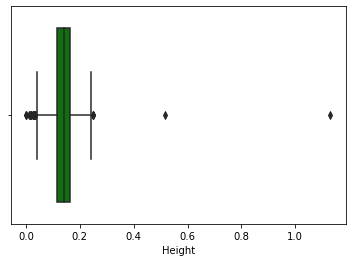

In [141]:
sns.boxplot(df['Height'],color='green')

<AxesSubplot:xlabel='Length'>

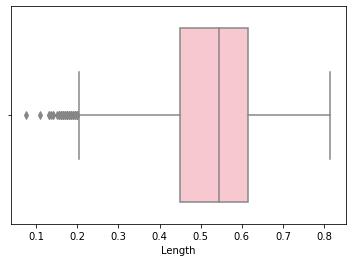

In [142]:
sns.boxplot(df['Length'],color="pink")

<AxesSubplot:xlabel='Diameter'>

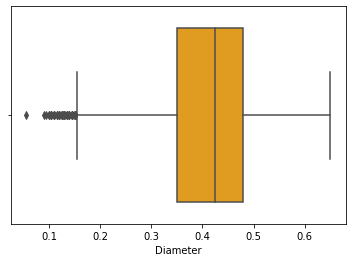

In [143]:
sns.boxplot(df['Diameter'],color="orange")

<AxesSubplot:xlabel='Whole weight'>

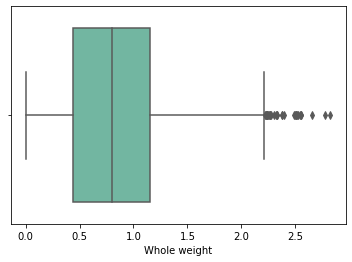

In [144]:
sns.boxplot(df['Whole weight'],palette="Set2")

<AxesSubplot:xlabel='Shucked weight'>

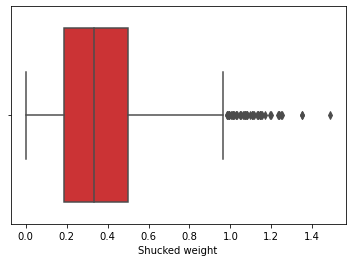

In [145]:
sns.boxplot(df['Shucked weight'],palette="Set1")

<AxesSubplot:xlabel='Viscera weight'>

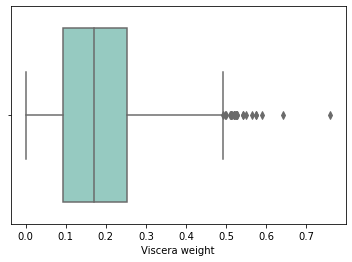

In [146]:
sns.boxplot(df['Viscera weight'],palette="Set3")

<AxesSubplot:xlabel='Rings'>

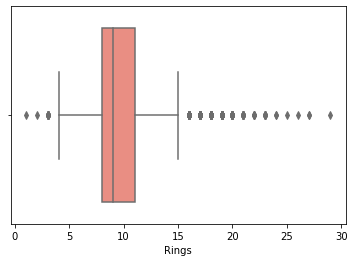

In [147]:
sns.boxplot(df['Rings'],color="salmon")

As per my observation from box plot.Its apparent that all the feature has outliers.The Sex feature is categorical data.Even if it has outliers,it will not impact on target feature

<AxesSubplot:xlabel='Sex', ylabel='count'>

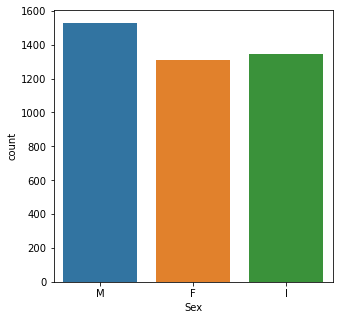

In [148]:
plt.figure(figsize=(5,5))
sns.countplot(df.Sex)

In [182]:
data=df

checking sex feature influence on height, length ,diameter

 converted the value of sex feature as M--->1 F---->2 I--->0

__BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Sex', ylabel='Height'>

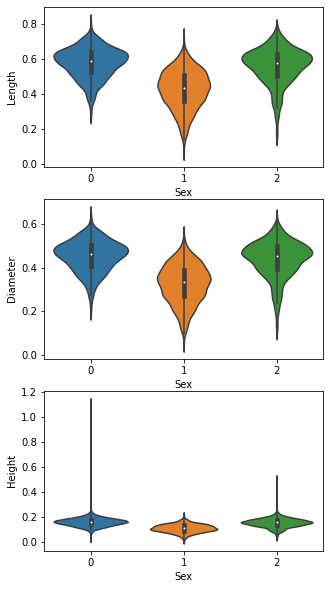

In [95]:
plt.figure(figsize=(5, 10))

colors = sns.color_palette()

rows = 3
cols = 1
i = 0

i += 1
plt.subplot(rows, cols, i)
sns.violinplot(data=df, x='Sex', y='Length')

i += 1
plt.subplot(rows, cols, i)
sns.violinplot(data=df, x='Sex', y='Diameter')
i += 1
plt.subplot(rows, cols, i)
sns.violinplot(data=df, x='Sex', y='Height')

checking the influence sex feature with height,diameter,length.from the observation of the above voilin plots it clearly shown that sex feature has high impact on height feature

<AxesSubplot:xlabel='Sex', ylabel='Shell weight'>

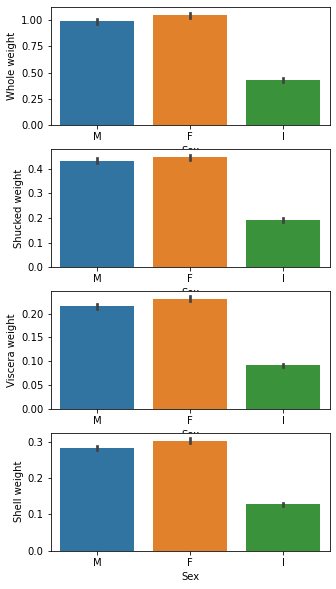

In [149]:
plt.figure(figsize=(5, 10))

colors = sns.color_palette()

rows = 4
cols = 1
i = 0
i += 1
plt.subplot(rows, cols, i)
sns.barplot(data=df, x='Sex', y='Whole weight')
i += 1


plt.subplot(rows, cols, i)
sns.barplot(data=df, x='Sex', y='Shucked weight')


i += 1
plt.subplot(rows, cols, i)
sns.barplot(data=df, x='Sex', y='Viscera weight')


i += 1
plt.subplot(rows, cols, i)
sns.barplot(data=df, x='Sex', y='Shell weight')

As per my observation from box plot.Its apparent that all the weight values are having simlar result with sex feature

<AxesSubplot:xlabel='Rings', ylabel='Height'>

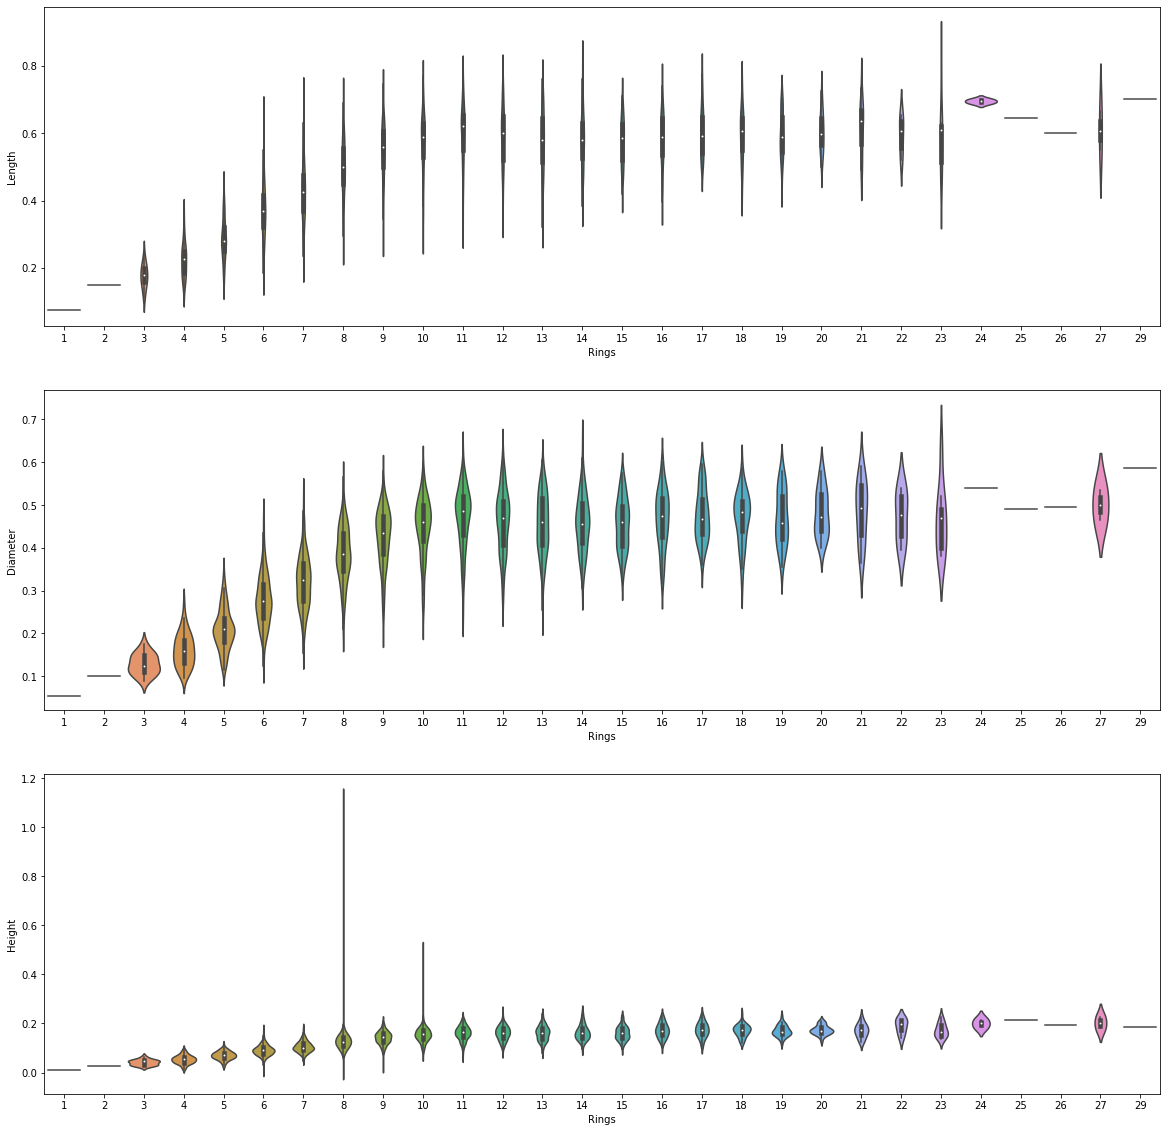

In [152]:
plt.figure(figsize=(20, 20))

colors = sns.color_palette()

rows = 3
cols = 1
i = 0
i += 1
plt.subplot(rows, cols, i)
sns.violinplot(data=df, x='Rings', y='Length')

i += 1
plt.subplot(rows, cols, i)
sns.violinplot(data=df, x='Rings', y='Diameter')


i += 1
plt.subplot(rows, cols, i)
sns.violinplot(data=df, x='Rings', y='Height')



As per the observation of plots it shows that after 10 rings or 11.5 years there is no major change in height but diameter and length are gradually increasng with age

<AxesSubplot:title={'center':'Height vs rings'}, xlabel='Rings', ylabel='Height'>

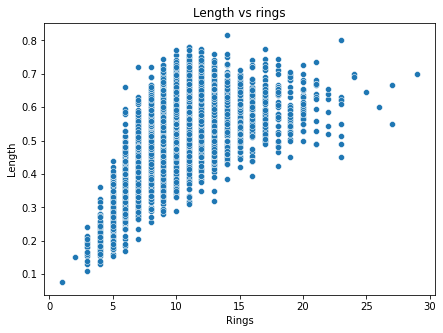

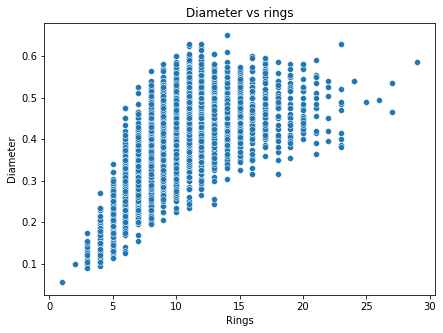

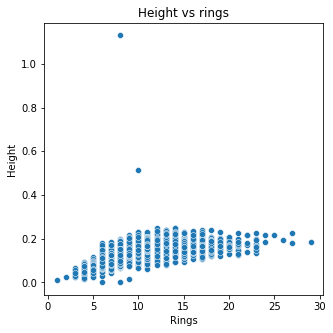

In [56]:
plt.figure(figsize=(7,5))
plt.title('Length vs rings')
sns.scatterplot(data=df,x="Rings",y="Length",palette="Set2")

plt.figure(figsize=(7,5))
plt.title('Diameter vs rings')
sns.scatterplot(data=df,x="Rings",y="Diameter",palette="Set2")

plt.figure(figsize=(5,5))
plt.title('Height vs rings')
sns.scatterplot(x=df["Rings"],y=df["Height"],palette="Set2")

As per the observation of plots it shows that after 10 rings or 11.5 years there is no major change in height but diameter and length are gradually increasng with age

__MULTIVARIATE ANALYSIS

<AxesSubplot:>

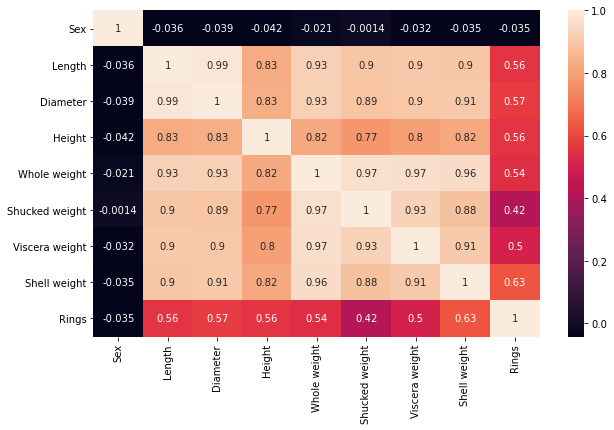

In [94]:

correlation=df.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True)

all the features are positively correlated with rings. all the features are strongly correlated with each other

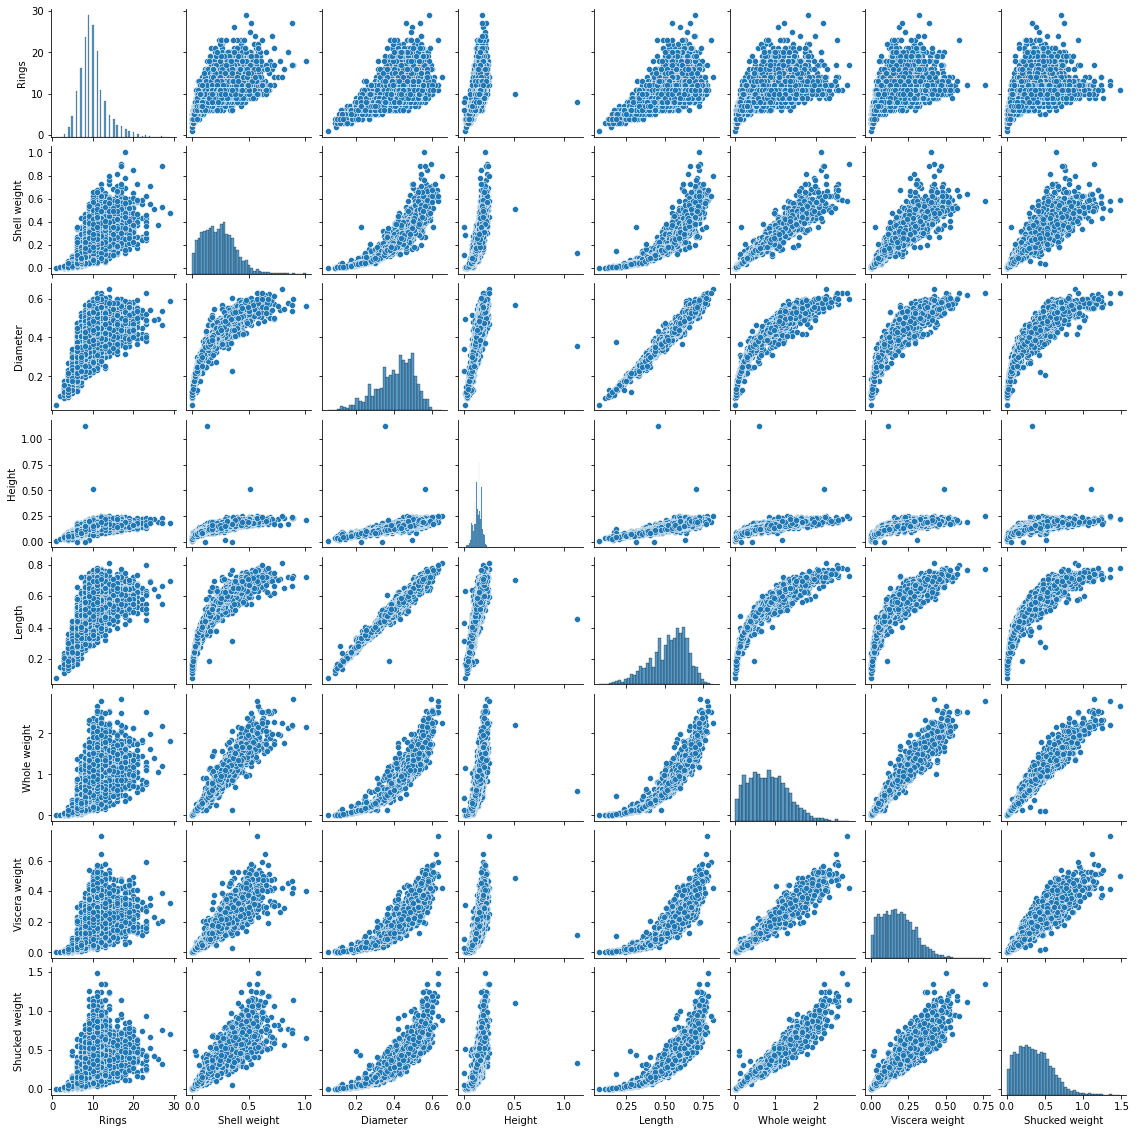

In [18]:
cols = ['Rings','Shell weight','Diameter','Height','Length','Whole weight','Viscera weight','Shucked weight']
sns.pairplot(df[cols],size=2,kind='scatter')
plt.show()

As per the observation of pair plots its evident that  height has no distributin after 0.4vlaue.the feature length and diametet has exponential distribution curve

__MODELLING BEFORE REMOVING OUTLIERS

The steps done below are
i)encoding categorical data
ii)transforming the data using min max scalar
iv)splitting test and train data 
iv)modelling and comparing accuracy of different model

In [5]:
data1=df.drop('Rings',axis=1)

In [6]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder()
data1['Sex']= label.fit_transform(data1['Sex']) 
print(data1['Sex'].unique())

[2 0 1]


_converting categorical column sex  to numerical coloumn by label encoder because normalization can be perform on ordinal and numerical data

In [7]:
from sklearn import preprocessing 
unscaled=data1.values
data_scaled = preprocessing.MinMaxScaler().fit_transform(unscaled)

_To scale the unscaled data ,I have used minmax scalar transmormation because min max scalar does not lose any data.if I use any other scalar like zscore it will lose some data which inturn decrease the accuracy

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [9]:
x=data_scaled
y=df['Rings']

__splitting data into test and train

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=1)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [50]:
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Ridge(),Lasso(),
        RandomForestRegressor()]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [51]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)


KNeighborsRegressor()
Mean absolute error 1.566932559825961
Mean squared error 4.971718636693256
Root Mean squared error 2.229735104601723
R2 Score 0.4938989020871585
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 1.510534405673118
Mean squared error 4.988895161184428
Root Mean squared error 2.2335834797885723
R2 Score 0.4921504005047981
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 2.0326323422770125
Mean squared error 8.447425670775925
Root Mean squared error 2.9064455389316906
R2 Score 0.14008580957020267
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 1.6154134201265253
Mean squared error 5.282194187768792
Root Mean squared error 2.298302457852054
R2 Score 0.46229373116804684
-------------------------

In [52]:
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

Minimum Mean Absolute error is shown by  SVR() 1.510534405673118
Minimum Mean squared error is shown by  RandomForestRegressor() 4.573251704133431
Minimum Root Mean squared error is shown by  RandomForestRegressor() 2.138516238922078
Maximun R2 Score is shown by  RandomForestRegressor() 0.534461244163825


__MODELLING AFTER REMOVING OUTLIERS USING ZSCORE__

##The steps done below are
i)encoding categorical data
ii)Removing outliers using Z score
iii)transforming the data using min max scalar 
iv)splitting test and train data 
v)modelling and comparing accuracy of different mode

In [12]:
data_clean=df

_converting categorical column sex  to numerical coloumn by label encoder because normalization can be perform on ordinal and numerical data

In [13]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder()
data_clean['Sex']= label.fit_transform(data_clean['Sex']) 
print(data_clean['Sex'].unique())

[2 0 1]


In [14]:
data_clean.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Detecting outliers

In [15]:
z = np.abs(zscore(data_clean))
print(np.where(z > 3 ))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

Removing outliers

In [16]:
data_mod = data_clean[(z<3).all(axis=1)]
data_mod.shape

(4027, 9)

In [17]:
((4177-4027)/4177)*100

3.5910940866650707

3.59% data is lost

__splitting data into test and train

In [18]:
x1=data_mod.drop('Rings',axis=1)
y1=data_mod['Rings']

In [19]:
from sklearn import preprocessing 
unscaled=x1
data= preprocessing.MinMaxScaler().fit_transform(unscaled)


_To scale the unscaled data ,I have used minmax scalar transmormation because min max scalar does not lose any data.if I use any other scalar like zscore it will lose some data which inturn decrease the accuracy

In [20]:
x=data
y=data_mod['Rings']

In [245]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Ridge(),Lasso(),AdaBoostRegressor(),
        RandomForestRegressor(n_estimators=100)]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]


In [246]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)

KNeighborsRegressor()
Mean absolute error 1.485004965243297
Mean squared error 4.008063555114201
Root Mean squared error 2.002014873849393
R2 Score 0.5003803546531539
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 1.372859315481665
Mean squared error 3.6209925332424135
Root Mean squared error 1.9028905731130241
R2 Score 0.5486301600797331
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 1.9761668321747765
Mean squared error 7.507447864945382
Root Mean squared error 2.7399722379880753
R2 Score 0.064169420427996
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 1.523842390406035
Mean squared error 3.9781311783867355
Root Mean squared error 1.9945253015158106
R2 Score 0.5041115338720767
--------------------------

In [247]:
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

Minimum Mean Absolute error is shown by  SVR() 1.372859315481665
Minimum Mean squared error is shown by  RandomForestRegressor() 3.6094555114200597
Minimum Root Mean squared error is shown by  RandomForestRegressor() 1.8998567081282893
Maximun R2 Score is shown by  RandomForestRegressor() 0.5500682916542408


the highest r2 score before removing outlier is 0.534461244163825(using Random forest regressor)
the highest r2 score after removing outlier is  0.5500682916542408 (using Random forest regressor)                                                                       
 
Here I have displayed each model's R2 score before and after removing outliers.Its clearly shown that the performance of the model after removing outliers is better than model before removing outliers.

Now I'm going to check and compare the performance by another two method to remove outliers 
                i)Removig extreme outliers
                ii)IQR technique to remove outliers

#__Removing Extreme outliers


_If I remove all outliers there is lot of data loss and there is no drastic change in accurracy so I decided to remove extreme outliers which is evident in below Scatter and box plots

In [72]:
data=df

In [42]:
h = data.loc[data.Height>0.4].index
data.drop(h, inplace=True)
vw = data.loc[data['Viscera weight']>0.6].index
data.drop(vw, inplace=True)
r = data.loc[data.Rings>26].index
data.drop(r, inplace=True)

<AxesSubplot:title={'center':'Height vs rings'}, xlabel='Rings', ylabel='Height'>

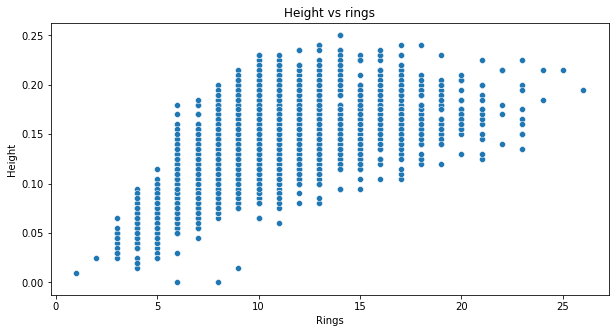

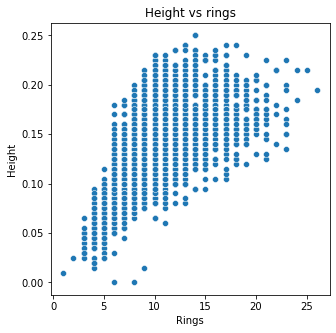

In [43]:
plt.figure(figsize=(10,5))
plt.title('Height vs rings')
sns.scatterplot(x=df["Rings"],y=df["Height"],palette="Set2")
plt.figure(figsize=(5,5))
plt.title('Height vs rings')
sns.scatterplot(x=data['Rings'],y=data['Height'],palette="Set2")

In [44]:
data.shape

(4170, 9)

In [45]:
x=data.drop('Rings',axis=1)
y=data['Rings']

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
m=RandomForestRegressor()
m.fit(xtrain,ytrain)
p=m.predict(xtest)
acc=m.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',acc)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('r2 score',r2)
     

Accuracy 0.5311685878048247
Mean absolute error 1.5900287631831256
Mean squared error 4.998994247363375
Root Mean squared error 2.235843073062905
r2 score 0.5311685878048247


By removing extreme outliers the accuracy and r2 score is not increased so I'm dropping this idea

The steps done below are
i)encoding categorical data 
ii)Removing outliers using IQR technique 
iii)transforming the data using min max scalar
iv)splitting test and train data
iv)modelling and comparing accuracy of different model

In [170]:
data=df
from sklearn import preprocessing 
label = preprocessing.LabelEncoder()
data['Sex']= label.fit_transform(data['Sex']) 
print(data['Sex'].unique())


[2 0 1]


In [ ]:
label encoding is used to encode categorical feature sex to numerical data


IQR to remove outliers

In [172]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
df_new=data[~((data<(Q1-1.5*IQR))| (data>(Q1+1.5*IQR))).any(axis=1)]

In [173]:
df_new.shape

(2962, 9)

In [174]:
((4177-2962)/4177)*100

29.08786210198707

In [ ]:
It losing 29% data

In [175]:
x1=df_new.drop('Rings',axis=1)
y1=df_new['Rings']

transforming un scaled data into scaled data using min max scalining technique

In [176]:
from sklearn import preprocessing 
unscaled=x1
scaled = preprocessing.MinMaxScaler().fit_transform(unscaled)

In [177]:
x=x1
y=df_new['Rings']

In [178]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import cross_validation
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Ridge(),Lasso(),
        RandomForestRegressor()]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
     

In [179]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    acc=m.score(xtest,ytest)
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    print("accuracy score",acc)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)

KNeighborsRegressor()
accuracy score 0.5505298612571619
Mean absolute error 0.984345479082321
Mean squared error 1.5413225371120107
Root Mean squared error 1.2415001156310903
R2 Score 0.5505298612571619
---------------------------------------------------------------------------------------------------------
SVR()
accuracy score 0.540553638629
Mean absolute error 0.9843982069245814
Mean squared error 1.5755329894794152
Root Mean squared error 1.255202369930608
R2 Score 0.540553638629
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
accuracy score 0.15467564002064893
Mean absolute error 1.271255060728745
Mean squared error 2.8987854251012144
Root Mean squared error 1.7025819877765693
R2 Score 0.15467564002064893
---------------------------------------------------------------------------------------------------------
LinearRegression()
accuracy score 0.49306436199692316
Mean absolute error 1.0474646929094746


In [181]:
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

Minimum Mean Absolute error is shown by  KNeighborsRegressor() 0.984345479082321
Minimum Mean squared error is shown by  KNeighborsRegressor() 1.5413225371120107
Minimum Root Mean squared error is shown by  KNeighborsRegressor() 1.2415001156310903
Maximun R2 Score is shown by  KNeighborsRegressor() 0.5505298612571619


Before removing outllier the highest R2 score is  0.546963923663929(RFR model)
after removing outlier using IQR the highest R2 score is 0.5505298612571619(KNR model)(29% data loss)
after removing outlier using zscore the highest R2 score is 0.5486301600797331(RFR model)(3.59% data loss)

outliers will reduce the performace of a model. In this dataset If I try to remove outliers using IQR the model accuracy is .002 % increased but it has  29% data loss.It is not good decision to allow 29% data loss.If I use zscore to remove outliers the accuracy got increased and it has 3.59 dataloss so I'm using min max scalar and zscore to remove outliers

__cross validation

In [25]:
from sklearn.model_selection import cross_val_score
knr=KNeighborsRegressor()
scores=cross_val_score(knr,xtrain,ytrain,scoring='r2',cv=5)
scores

array([0.37648842, 0.50719057, 0.42256817, 0.49297925, 0.49371218])

In [27]:
from sklearn.model_selection import cross_val_score
rid=Ridge()
scores=cross_val_score(rid,xtrain,ytrain,scoring='r2',cv=5)
scores

array([0.45157982, 0.52920626, 0.46831934, 0.53097219, 0.54134305])

In [26]:
from sklearn.model_selection import cross_val_score
svr=SVR()
scores=cross_val_score(svr,xtrain,ytrain,scoring='r2',cv=5)
scores

array([0.46720869, 0.5526833 , 0.47727655, 0.52915325, 0.55670908])

In [28]:
from sklearn.model_selection import cross_val_score
rfr=RandomForestRegressor()
scores=cross_val_score(rfr,xtrain,ytrain,scoring='r2',cv=5)
scores

array([0.47255276, 0.54176269, 0.47197259, 0.55566284, 0.55378737])

In [29]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,xtrain,ytrain,scoring='r2',cv=5)
scores

array([0.43834379, 0.5310576 , 0.47755528, 0.54487826, 0.54936431])

difference of Linear Regression models

In [31]:

 0.54936431-0.5041115338720767

0.04525277612792322

    difference of Kneighbour models

In [32]:
0.5003803546531539-0.49371218

0.006668174653153891

difference of svr models

In [33]:
0.55670908-0.5486301600797331

0.00807891992026688

difference of Random forest regressor models

In [51]:
0.55378737-0.5515647788291829

0.002222591170817134

here the difference of random forest regressor is less so I'm choosing Randomfprest Regressor as best model

In [ ]:
Hyper Tuning

In [257]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'bootstrap': [True],
    'max_features': ['auto', 'sqrt','log2'],
    'criterion': ['mse', 'mae'],
    'n_estimators': [10, 100, 200, 500]
}
cvInstance = GridSearchCV(RandomForestRegressor(), param_grid = parameters, cv = 5, scoring = "r2")

In [258]:
cvInstance.fit(data_clean.drop(["Rings"], axis=1), data_clean['Rings'])
 
cvInstance.best_estimator_

RandomForestRegressor(criterion='mae', max_features='log2', n_estimators=500)

In [21]:
from sklearn.ensemble import RandomForestRegressor
x=data
y=data_mod['Rings']

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
model=RandomForestRegressor(n_estimators=500,max_features='log2')
model.fit(xtrain,ytrain)
p=model.predict(xtest)
acc=model.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',acc)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('r2 score',r2)
     

Accuracy 0.5630029542238448
Mean absolute error 1.4103714001986096
Mean squared error 3.5056906772591856
Root Mean squared error 1.8723489731508882
r2 score 0.5630029542238448


__Before Removing outliers,doing scaling the r2 score of random forest model is 0.49356327277355593

__Before hyper tuning: 

r2 score of Randomforest Regressor model is 0.5500744438737917

Mean absolute error 1.4360873882820258
Mean squared error 3.6094061569016875
Root Mean squared error 1.8998437190731472


__After hyper tuning 
r2 score of Randomforest Regressor model is 0.5630029542238448


__save the model

In [28]:
from joblib import dump
dump(model, 'model_abalone.joblib')

['model_abalone.joblib']

In [30]:
from joblib import load
loaded = load('model_abalone.joblib')